In [3]:
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['sum', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


2.4127266095972308e-05 0.0005758341438458769


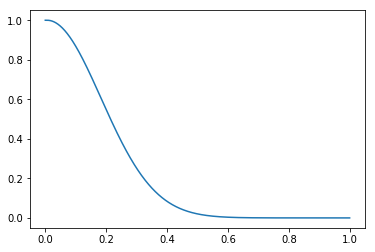

In [4]:
n = 1000
m = 10
c = 0.1
tau = 0.01
M = 2
a = 0
b = 1
max = 0
sum = 0
tv = 0
d = 0.25
h = (b - a) / n
r = c * tau / h
x = np.zeros(n, float)
u1 = np.zeros(n, float)
u = np.zeros((n, m), float)
v = np.zeros((n, m), float)
f = np.zeros((n - 1, m - 1), float)
for i in range(n):
    x[i] = a + h * i

for i in range(n):
    u[i][0] = exp(- (x[i]/d) ** M)


for j in range(m):
    u[0][j] = exp(- (a / d) ** M)

for i in range(n):       # exact solution
    for j in range(m):
        v[i][j] = exp(- ((x[i] - c * tau * j)/d) ** M)


for j in range(1, m):        # laksa vend
    u[n - 1][j] = 0


for i in range(1, n - 1):
    for j in range(1, m):
        f[i - 1][j - 1] = u[i - 1][j - 1] + (u[i][j - 1] - u[i - 1][j - 1]) * (1 - r)/ 2
        f[i][j - 1] = u[i][j - 1] + (u[i + 1][j - 1] - u[i][j - 1]) * (1 - r) / 2
        u[i][j] = u[i][j - 1] - r * (f[i][j - 1] - f[i - 1][j - 1])


for i in range(n):
    if fabs(u[i][6] - v[i][6]) > max:
        max = fabs(u[i][6] - v[i][6])


for i in range(n):
    sum += (u[i][6] - v[i][6]) ** 2

for i in range(n):
    u1[i] = u[i][6]


print(sqrt(sum/n), max)
plt.plot(x, u1)
plt.show()